In [185]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('default')
plt.style.use('dark_background')

In [186]:
new_york_df = pd.read_csv('new_york.csv')
london_df = pd.read_csv('london.csv')

posts = pd.concat([new_york_df, london_df], sort=False)

posts

,input.location_id,input.max_id,data.location.edge_location_to_media.edges.node.comments_disabled,data.location.edge_location_to_media.edges.node.id,data.location.edge_location_to_media.edges.node.edge_media_to_caption.edges[0].node.text,data.location.edge_location_to_media.edges.node.shortcode,data.location.edge_location_to_media.edges.node.edge_media_to_comment.count,data.location.edge_location_to_media.edges.node.taken_at_timestamp,data.location.edge_location_to_media.edges.node.dimensions.height,data.location.edge_location_to_media.edges.node.dimensions.width,...,data.location.edge_location_to_top_posts.edges[0].node.edge_liked_by.count,data.location.edge_location_to_top_posts.edges[0].node.edge_media_preview_like.count,data.location.edge_location_to_top_posts.edges[0].node.owner.id,data.location.edge_location_to_top_posts.edges[0].node.thumbnail_src,data.location.edge_location_to_top_posts.edges[0].node.thumbnail_resources[0].src,data.location.edge_location_to_top_posts.edges[0].node.thumbnail_resources[0].config_width,data.location.edge_location_to_top_posts.edges[0].node.thumbnail_resources[0].config_height,data.location.edge_location_to_top_posts.edges[0].node.is_video,status,data.location.edge_location_to_top_posts.edges[0].node.video_view_count
0,212988663,NaN,False,2156813434858171441,C I M A R R O M ✖️ Named after the African sla...,B3uimRHguwx,0,1571332218,1080,1080,...,4140,4140,1508200835,https://scontent-lga3-1.cdninstagram.com/vp/b2...,https://scontent-lga3-1.cdninstagram.com/vp/c1...,150,150,False,ok,NaN
1,212988663,NaN,False,2156813385241370562,Thinking about the weekend already... #editori...,B3uili6Hp_C,0,1571332213,1332,1080,...,4140,4140,1508200835,https://scontent-lga3-1.cdninstagram.com/vp/b2...,https://scontent-lga3-1.cdninstagram.com/vp/c1...,150,150,False,ok,NaN
2,212988663,NaN,False,2156813372977696896,•\nthursdays are early morning run days\nand i...,B3uilXfJdCA,0,1571332211,1080,1080,...,4140,4140,1508200835,https://scontent-lga3-1.cdninstagram.com/vp/b2...,https://scontent-lga3-1.cdninstagram.com/vp/c1...,150,150,False,ok,NaN
3,212988663,NaN,False,2156813338624153751,#NewYork #getaway,B3uik3fhFiX,0,1571332207,810,1080,...,4140,4140,1508200835,https://scontent-lga3-1.cdninstagram.com/vp/b2...,https://scontent-lga3-1.cdninstagram.com/vp/c1...,150,150,False,ok,NaN
4,212988663,NaN,False,2156812865867088322,NAPKINS FILM OUT NOW- find the link on my page <3,B3uid_NAAHC,0,1571332205,422,750,...,4140,4140,1508200835,https://scontent-lga3-1.cdninstagram.com/vp/b2...,https://scontent-lga3-1.cdninstagram.com/vp/c1...,150,150,False,ok,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30583,213385402,2.156034e+18,False,2156033888212731513,"Today in London, youth activists from across t...",B3rxWXun8Z5,0,1571239289,1080,1080,...,2538,2538,180098200,https://scontent-lga3-1.cdninstagram.com/vp/d4...,https://scontent-lga3-1.cdninstagram.com/vp/c5...,150,150,False,ok,NaN
30584,213385402,2.156034e+18,False,2156033873817784818,With @idnk.him 🎓📚😜,B3rxWKUnlHy,2,1571239288,937,750,...,2538,2538,180098200,https://scontent-lga3-1.cdninstagram.com/vp/d4...,https://scontent-lga3-1.cdninstagram.com/vp/c5...,150,150,False,ok,NaN
30585,213385402,2.156034e+18,False,2156033873934570018,Posted @withrepost • @financialprofessional It...,B3rxWKblFIi,0,1571239288,1080,1080,...,2538,2538,180098200,https://scontent-lga3-1.cdninstagram.com/vp/d4...,https://scontent-lga3-1.cdninstagram.com/vp/c5...,150,150,False,ok,NaN
30586,213385402,2.156034e+18,False,2156033842025585661,Loving London architecture... especially the b...,B3rxVstp9v9,9,1571239284,1345,1080,...,2538,2538,180098200,https://scontent-lga3-1.cdninstagram.com/vp/d4...,https://scontent-lga3-1.cdninstagram.com/vp/c5...,150,150,False,ok,NaN


In [187]:
posts['posted_datetime'] = pd.to_datetime(
    posts['data.location.edge_location_to_media.edges.node.taken_at_timestamp'],
    unit='s',
)
posts = posts.loc[posts['posted_datetime'] < '2019-10-17 16:59:59']
posts = posts.loc[posts['posted_datetime'] >= '2019-10-16 17:00:00']

posts['posted_datetime_minute'] = posts['posted_datetime'].dt.floor('min')
posts['posted_datetime_hour'] = posts['posted_datetime'].dt.floor('H')

posts['posted_datetime_hour'].min(), posts['posted_datetime_hour'].max()

(Timestamp('2019-10-16 17:00:00'), Timestamp('2019-10-17 16:00:00'))

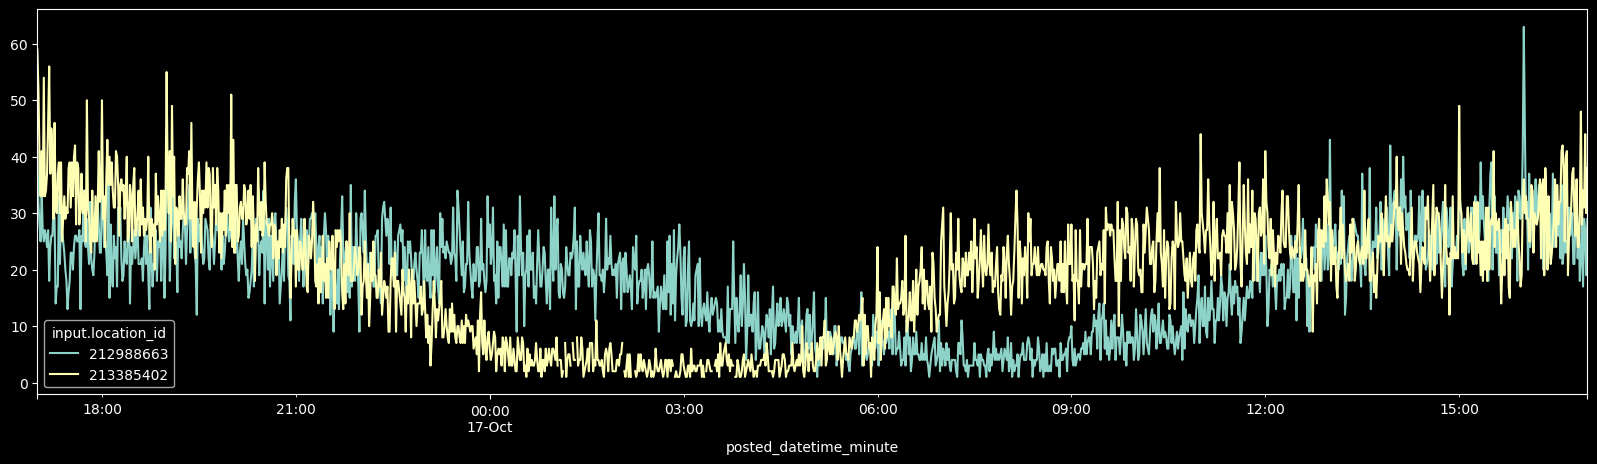

In [188]:
minute_plot = posts \
    .groupby('input.location_id')['posted_datetime_minute'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

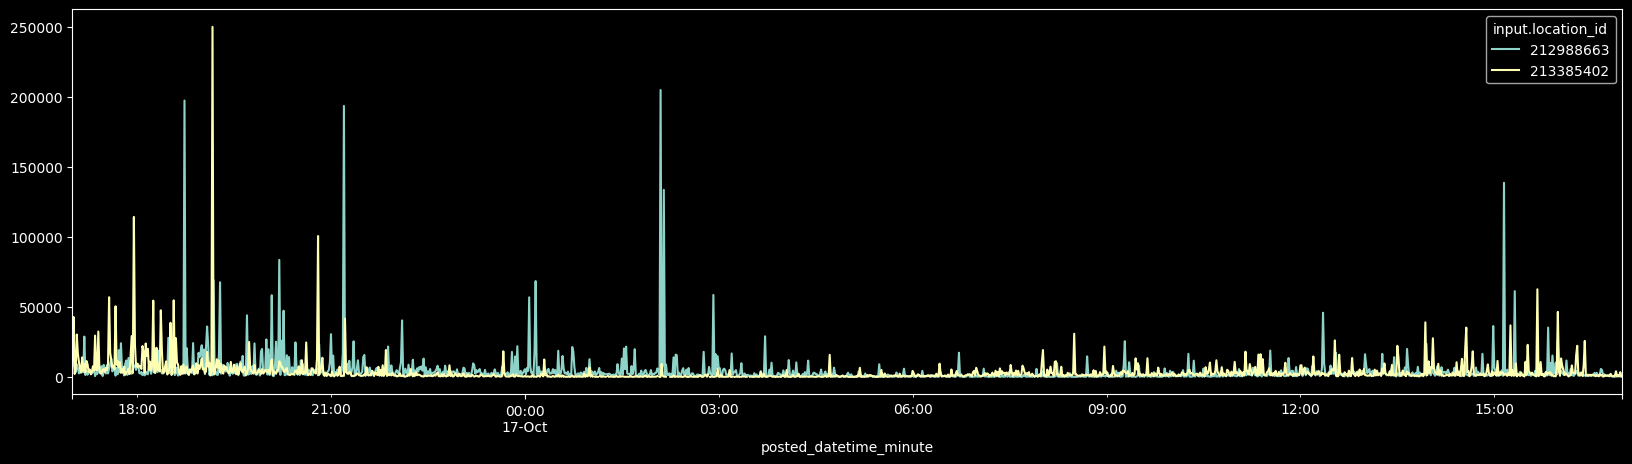

In [189]:
posts \
    .groupby(['input.location_id', 'posted_datetime_minute']) \
        ['data.location.edge_location_to_media.edges.node.edge_liked_by.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

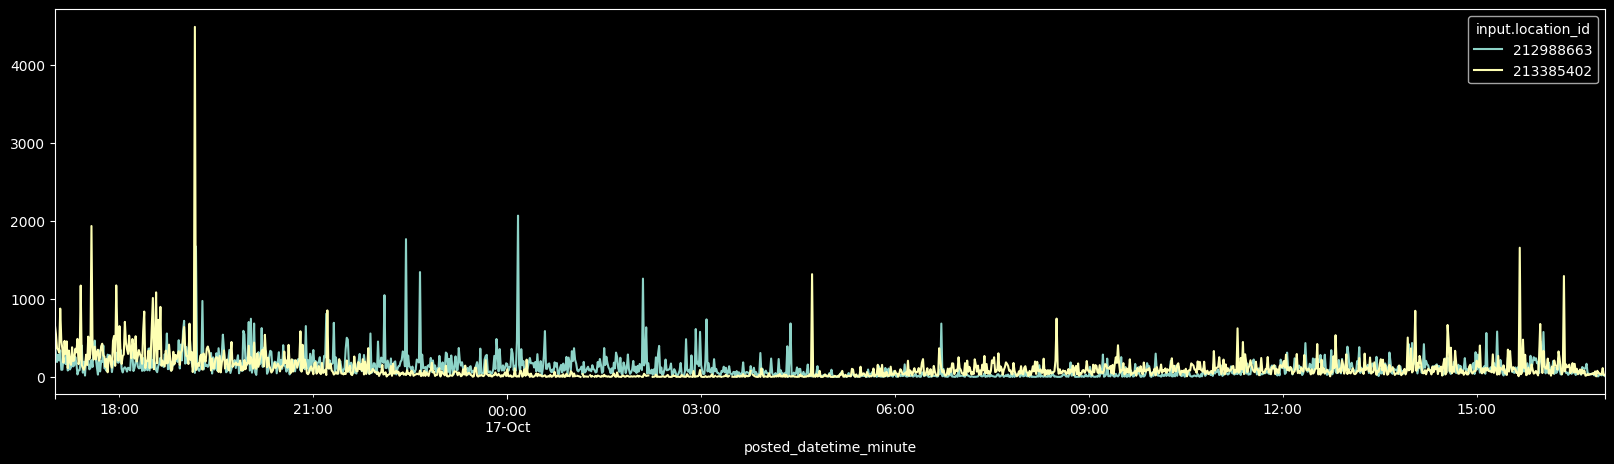

In [190]:
posts \
    .groupby(['input.location_id', 'posted_datetime_minute']) \
        ['data.location.edge_location_to_media.edges.node.edge_media_to_comment.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

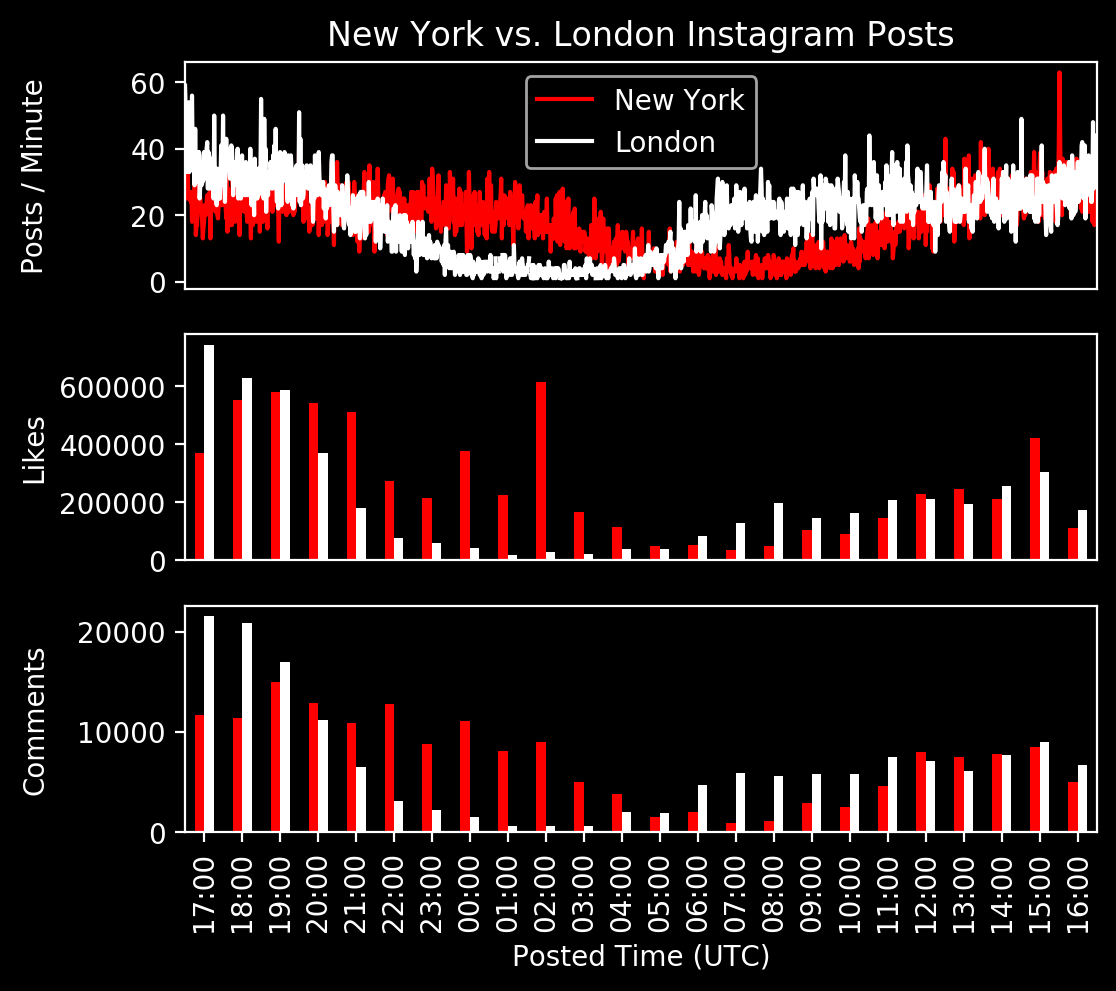

In [191]:
fig = plt.figure(tight_layout=False, figsize=(1, 1), dpi=200)
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 2])
ax3 = fig.add_subplot(gs[2, 2])

COLORS = [
    'red',
    'white',
]

volume_plot = posts \
    .groupby('input.location_id')['posted_datetime_minute'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(
        title='New York vs. London Instagram Posts',
        ax=ax1,
        kind='line',
        figsize=(20,5), 
        color=COLORS,
    )
volume_plot.set_xlabel('')
volume_plot.set_ylabel('Posts / Minute')
volume_plot.legend(['New York', 'London'])
volume_plot.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
)

like_plot = posts \
    .groupby(['input.location_id', 'posted_datetime_hour']) \
        ['data.location.edge_location_to_media.edges.node.edge_liked_by.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(ax=ax2, kind='bar', figsize=(20,5), color=COLORS, legend=False)
like_plot.set_xlabel('')
like_plot.set_ylabel('Likes')
like_plot.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
)

d = posts \
    .groupby(['input.location_id', 'posted_datetime_hour']) \
        ['data.location.edge_location_to_media.edges.node.edge_media_to_comment.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)

comment_plot = d \
    .plot(ax=ax3, kind='bar', figsize=(20,5), color=COLORS, legend=False)
comment_plot.set_xlabel('Posted Time (UTC)')
comment_plot.set_ylabel('Comments', labelpad=10)


ax3.xaxis.set_major_formatter(plt.FixedFormatter(d.index.to_series().dt.strftime("%H:00")))

# ax3.xaxis_date()
# ax3.set_major_formatter(mdates.DateFormatter('%d'))

ax1.get_yaxis().set_label_coords(-0.15, 0.5)